# Credit Card Fraud Detection

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import seaborn as sns

## Loading the Dataset

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing 

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
zero_class = df[df['Class'] == 0]
one_class = df[df['Class'] == 1]

zero_downsampled = resample(zero_class, 
                                replace=False,
                                n_samples=len(one_class),
                                random_state=42)

df = pd.concat([zero_downsampled, one_class])

print(df['Class'].value_counts())

0    492
1    492
Name: Class, dtype: int64


In [7]:
df.shape

(984, 31)

## Data Visualization

In [8]:
df_zero = df[df['Class'] == 0]
df_one = df[df['Class'] == 1]

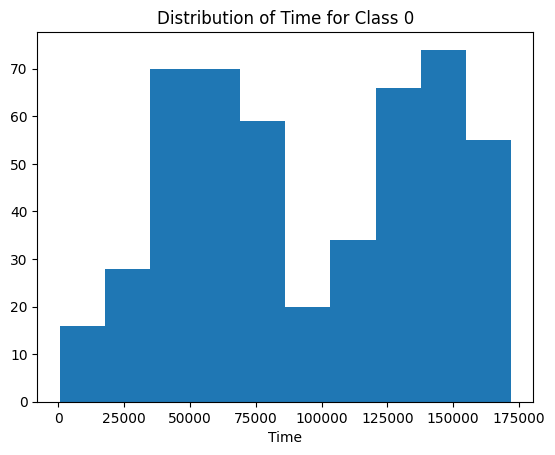

In [9]:
plt.hist(df_zero.Time)
plt.xlabel("Time")
plt.title("Distribution of Time for Class 0")
plt.show()

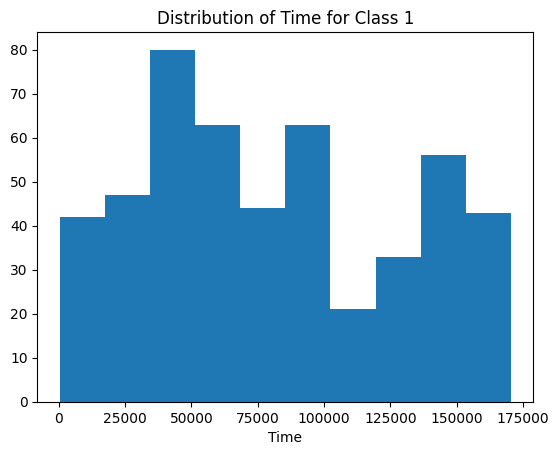

In [10]:
plt.hist(df_one.Time)
plt.xlabel("Time")
plt.title("Distribution of Time for Class 1")
plt.show()

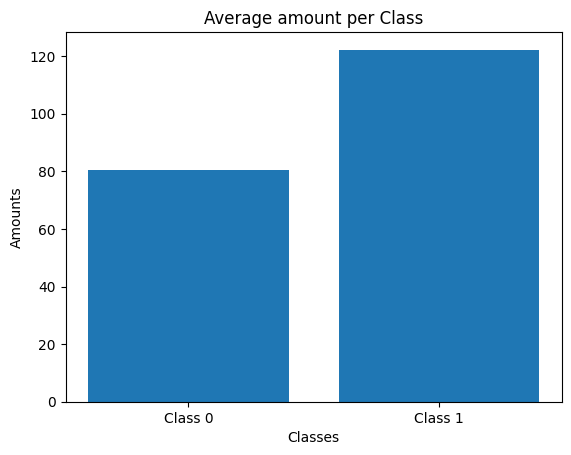

In [11]:
plt.bar(['Class 0', 'Class 1'],[np.mean(df_zero.Amount),np.mean(df_one.Amount)])
plt.xlabel("Classes")
plt.ylabel("Amounts")
plt.title("Average amount per Class")
plt.show()

## Train Test Split

In [12]:
x_data = df.drop(["Class"], axis = 1)

In [13]:
y_data = df["Class"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

## Model Building

In [15]:
knn = KNeighborsClassifier()
svm = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()

standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(x_train)

models = [knn, svm, dtc, rfc, lr]
X_test = standard_scaler.fit_transform(x_test)

d = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    d[f"{model}"] = accuracy_score(y_test, y_pred)

df_accuracy = pd.DataFrame([d]).T.reset_index()
df_accuracy.columns = ["Models", "Accuracy"]
df_accuracy


,Models,Accuracy
0,KNeighborsClassifier(),0.922297
1,SVC(),0.939189
2,DecisionTreeClassifier(),0.881757
3,RandomForestClassifier(),0.925676
4,LogisticRegression(),0.929054


### As we can see that SVC has more accuracy we consider SVC Model

## Evaluation Metrices

In [16]:
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
Confusion_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print("F1 score :", f1)
print("Recall :", recall)
print("Precision :", precision)

F1 score : 0.9257950530035336
Recall : 0.8972602739726028
Precision : 0.9562043795620438


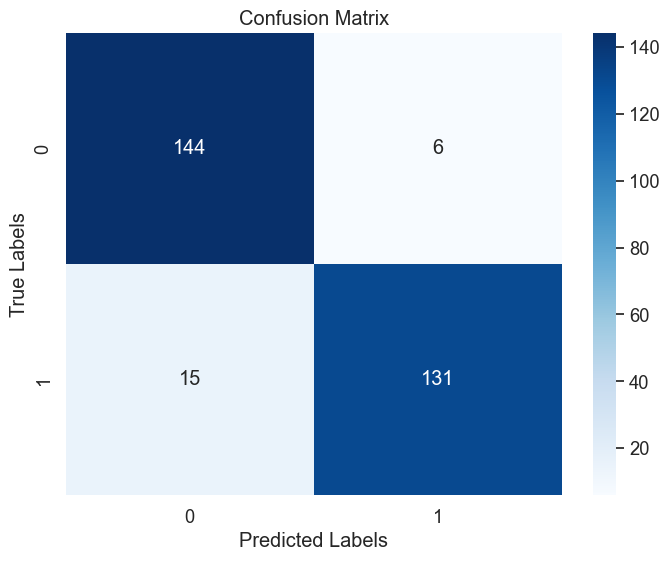

In [18]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show() 